<a href="https://colab.research.google.com/github/Kim-JHyun/RPA_Web/blob/main/12_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  종합실습 과제 : 타이타닉 생존 여부 분류하기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt


### 1. 데이터 불러오기

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. EDA

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 1) 결측치 확인

In [ ]:
# 결측치 확인
titanic.isnull().sum() # Age, Cabin, Embarked 결측치 처리 필요

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Cabin은 전체 데이터 891개 중 결측치가 687개나 되므로 결측치 처리 하지 않고 분석에서 제외

#### 2) 주요 변수 분포 확인

In [ ]:
# Target(Survived) 값 분포 확인
# Survived : 범주형 변수
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

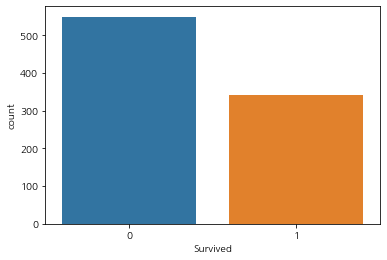

In [ ]:
# 막대그래프 그리기
sns.countplot(data = titanic, x = 'Survived')

In [ ]:
# matplotlib에서의 한글 폰트 문제 해결
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

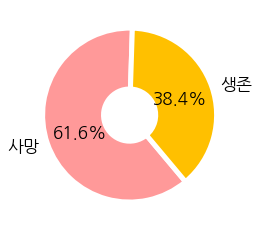

In [ ]:
# 파이그래프 그리기
ratio = [549, 342]
labels = ['사망', '생존', ]
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=310, counterclock=False, colors=colors, wedgeprops=wedgeprops, textprops={'size': 17})
plt.show()

In [ ]:
# 성별 분포 확인
# Sex : 범주형 변수
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

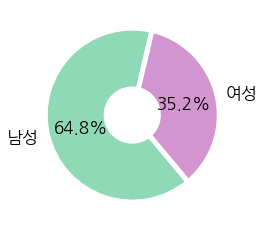

In [ ]:
# 파이그래프 그리기
ratio = [ 577, 314]
labels = ['남성', '여성', ]
colors = ['#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=310, counterclock=False, colors=colors, wedgeprops=wedgeprops, textprops={'size': 17})
plt.show()

In [ ]:
# 성별 생존 여부 시각화
# 성별/생존 여부 분포
titanic.groupby(by = ['Sex', 'Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

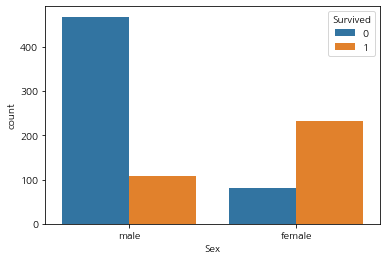

In [ ]:
sns.countplot(data = titanic, x = 'Sex', hue = 'Survived')

In [ ]:
# titanic 데이터 셋의 성별 인원수를 객실 등급별로 시각화
# Pclass ; 범주형 변수
# 성별/객실 등급별 분포
titanic.groupby(by = ['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

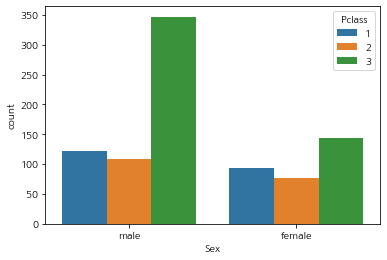

In [ ]:
sns.countplot(data = titanic, x = 'Sex', hue = 'Pclass')

In [ ]:
# Pclass별 생존 여부 시각화
# Pclass/생존 여부 분포
titanic.groupby(by = ['Pclass', 'Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

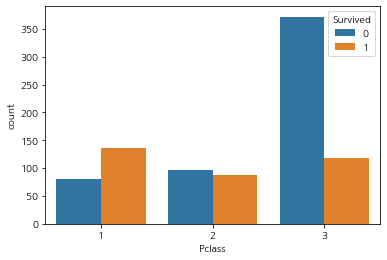

In [ ]:
sns.countplot(data = titanic, x = 'Pclass', hue = 'Survived')

C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


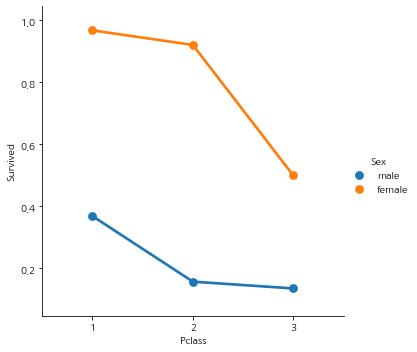

In [ ]:
# 객실등급, 성별에 따른 생존율 차이 시각화
# Pclass와 Sex 모두 범주형 변수이므로 factorplot 사용
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data= titanic, errwidth=0)
plt.show()

In [ ]:
# 객실 등급별/성별 사망자 수 확인
titanic.groupby(by = ['Pclass', 'Sex', 'Survived'])['Sex'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Sex, dtype: int64

In [ ]:
# 1등급 여자 승객 94명 중 3명 사망

C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


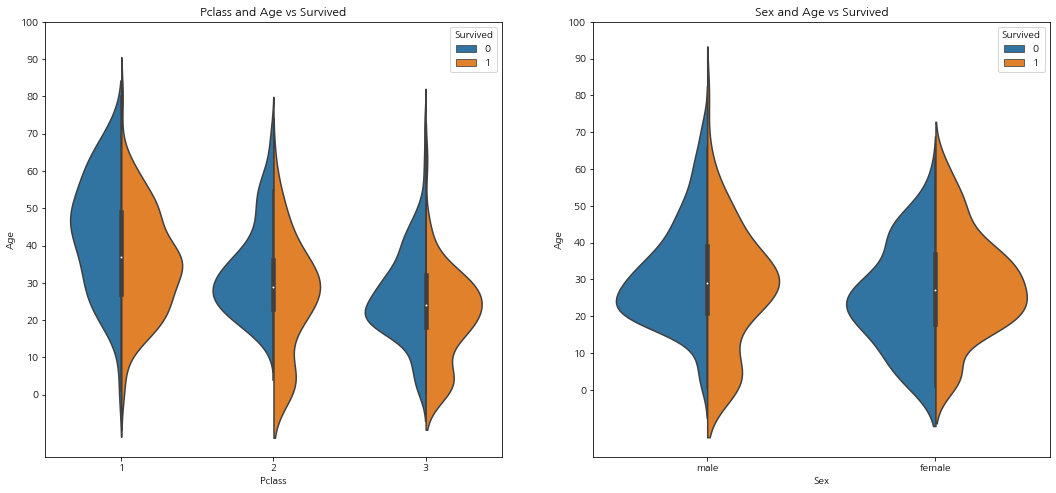

In [ ]:
# 연령대에 따른 생존 가능성 분석
# age는 연속형 변수이므로 바이올린 플롯으로 시각화
f, ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot("Pclass", "Age", hue = 'Survived', data= data, split = True, ax = ax[0]) # 연령대와 Pclass
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', "Age", hue = "Survived", data = data, split = True, ax = ax[1]) # 연령대와 성별
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [ ]:
# Pclass = 1일때 생존자 연령 평균이 사망자 보다 낮음을 알 수 있음
# 전반적으로 유아들의 생존율이 사망율 보다 높음을 알 수 있음

### 3) age 결측지 처리

In [ ]:
# Name : 문자형 변수
titanic['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# 이름 이니셜 파생변수 생성
titanic["Initial"] = 0
for i in titanic:
    titanic["Initial"] = titanic.Name.str.extract('([A-Za-z]+)\.') # 하나 이상의 알파벳 문자(대문자 및 소문자 모두)와 마침표를 추출하는 정규표현식

In [ ]:
titanic["Initial"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [ ]:
titanic["Initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
pd.crosstab(titanic.Initial,titanic.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
# 성별이 불분명한 명칭은 Miss, Mr 등으로 대체
titanic['Initial'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],\
                           ['Mr','Mr','Mrs','Mr','Mr','Mr','Mrs','Mr', 'Miss','Miss','Mrs','Mr', 'Mr'],inplace=True)

In [ ]:
titanic.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.818792
Mr        33.022727
Mrs       35.909910
Name: Age, dtype: float64

In [ ]:
# 이니셜에 따라 연령값 평균 대체
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age']=36

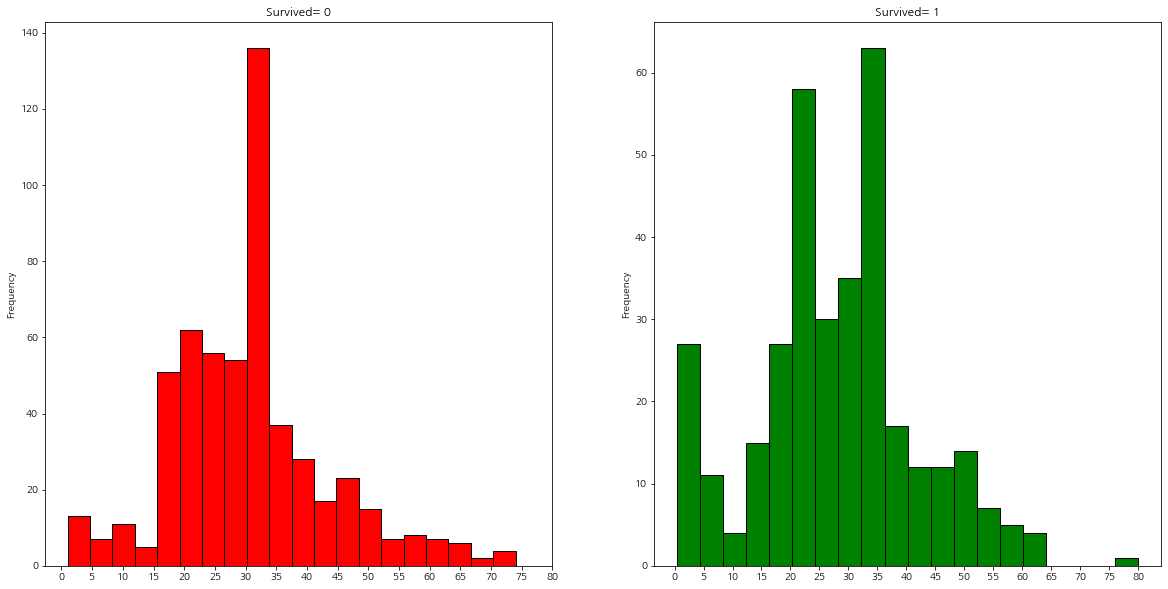

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
titanic[titanic['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
titanic[titanic['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### 4) Embarked 결측치 처리

In [ ]:
# Embarked(탑승지) : 범주형 변수
pd.crosstab([titanic.Embarked, titanic.Pclass], [titanic.Sex, titanic.Survived])

Sex             female     male    
Survived             0   1    0   1
Embarked Pclass                    
C        1           1  42   25  17
         2           0   7    8   2
         3           8  15   33  10
Q        1           0   1    1   0
         2           0   2    1   0
         3           9  24   36   3
S        1           2  46   51  28
         2           6  61   82  15
         3          55  33  231  34

<AxesSubplot:xlabel='Embarked', ylabel='count'>

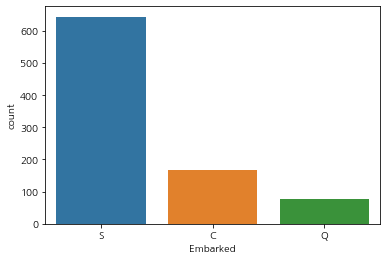

In [ ]:
# 탑승지별 승객수
sns.countplot(data = titanic, x = 'Embarked')

C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

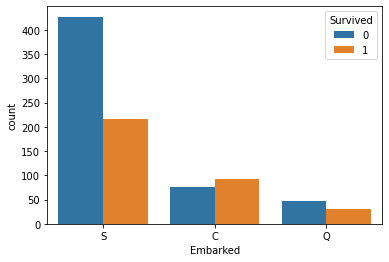

In [ ]:
sns.countplot('Embarked',hue='Survived',data=titanic)

C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

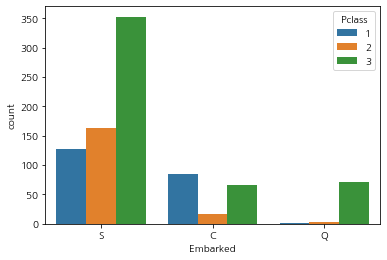

In [ ]:
sns.countplot('Embarked',hue='Pclass',data=titanic)

In [ ]:
# S는 3등급 승객이 많아 사망자가 많았음

C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


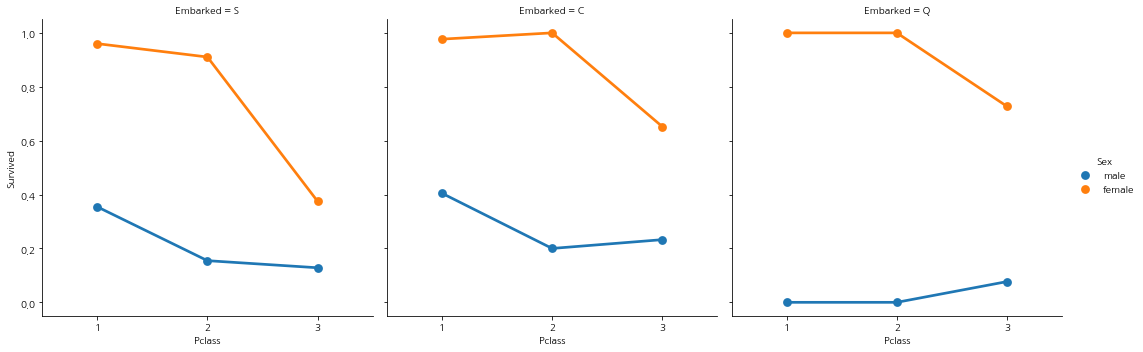

In [ ]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = titanic, errwidth=0)

In [ ]:
# Embarked 결측치 처리 : 결측치 2개를 최빈값인 S로 대체
titanic['Embarked'].fillna('S', inplace = True)

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

### 5) 나머지 변수 검토

In [ ]:
# SibSp(형제자매/배우자) : 이산형 변수
# SibSp 분포 검토
pd.crosstab([titanic.SibSp], titanic.Survived) # 형제자매/배우자가 1~2명인 경우 생존 확룰 높음

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

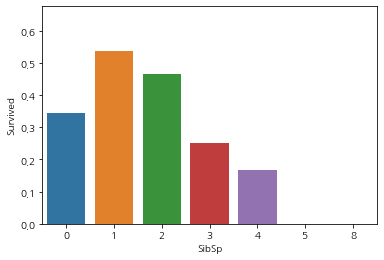

In [ ]:
sns.barplot('SibSp', 'Survived', data = titanic, errwidth=0) #error line 삭제 옵션

In [ ]:
pd.crosstab([titanic.Pclass, titanic.SibSp], [titanic.Pclass])

Pclass          1    2    3
Pclass SibSp               
1      0      137    0    0
       1       71    0    0
       2        5    0    0
       3        3    0    0
2      0        0  120    0
       1        0   55    0
       2        0    8    0
       3        0    1    0
3      0        0    0  351
       1        0    0   83
       2        0    0   15
       3        0    0   12
       4        0    0   18
       5        0    0    5
       8        0    0    7

In [ ]:
# 형제자매/배우자가 5~8명인 경우는 대부분 3등선실에 탐승, 생존자 없음!!

In [ ]:
# Parch(부모/아이들) : 이산형변수
pd.crosstab([titanic.Parch], titanic.Survived) # 형제자매/배우자가 1~3명인 경우 생존 확룰 높음

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

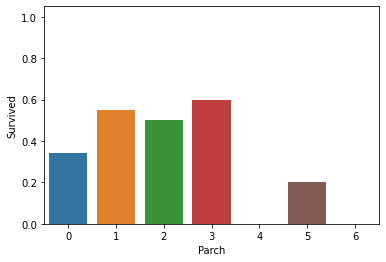

In [ ]:
sns.barplot('Parch', 'Survived', data = titanic, errwidth=0)

In [ ]:
pd.crosstab([titanic.Pclass, titanic.Parch], [titanic.Pclass])

Pclass          1    2    3
Pclass Parch               
1      0      163    0    0
       1       31    0    0
       2       21    0    0
       4        1    0    0
2      0        0  134    0
       1        0   32    0
       2        0   16    0
       3        0    2    0
3      0        0    0  381
       1        0    0   55
       2        0    0   43
       3        0    0    3
       4        0    0    3
       5        0    0    5
       6        0    0    1

In [ ]:
# Ticket 번호는 생존율과 관계 없으니 분석하지 않음

In [ ]:
# Fare : 연속형 변수
print(titanic['Fare'].max())
print(titanic['Fare'].min())
print(titanic['Fare'].mean())

512.3292
0.0
32.2042079685746


C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

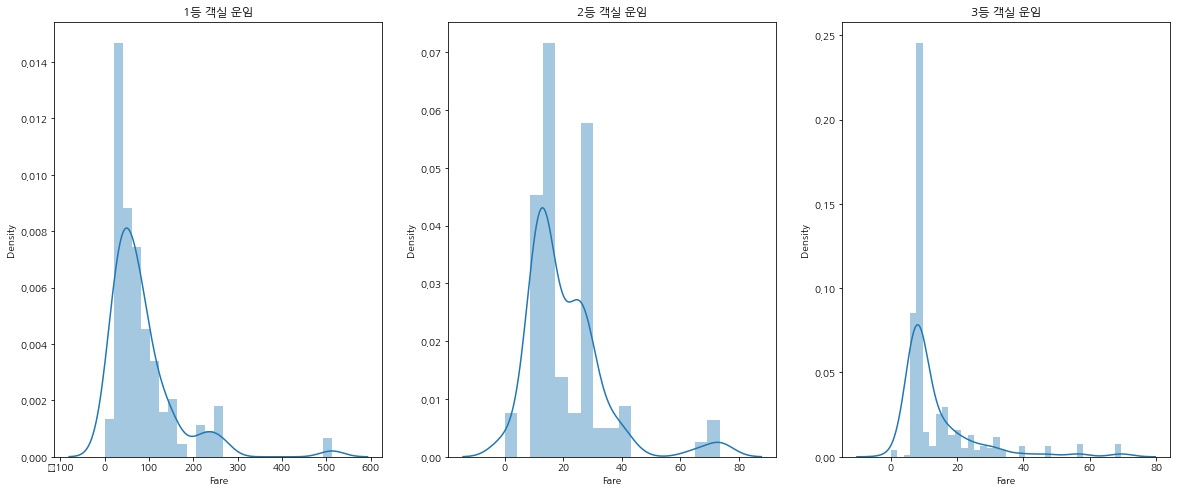

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(titanic[titanic['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('1등 객실 운임')
sns.distplot(titanic[titanic['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('2등 객실 운임')
sns.distplot(titanic[titanic['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('3등 객실 운임')
plt.show()

### 6) 변수간 상관관계 분석

<AxesSubplot:>

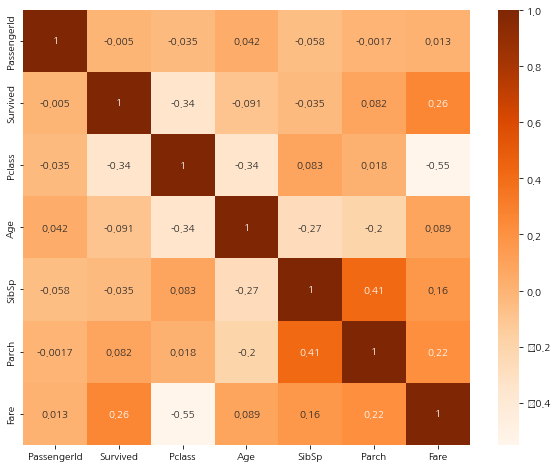

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(),cmap='Oranges',annot=True)

## 3. 데이터 전처리

<AxesSubplot:ylabel='Frequency'>

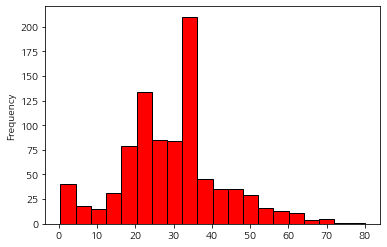

In [ ]:
# age를 구간으로 변경하는 파생변수 생성
# 분류모델에서 연속형 변수를 그대로 적용하면 머신러닝 모델의 복잡도가 증가하기 때문에 가능하면 구간화 처리가 바람직
titanic.Age.plot.hist(bins=20,edgecolor='black',color='red')


In [ ]:
titanic.loc[titanic['Age']< 10,'Age_group']=0
titanic.loc[(titanic['Age']>=10)&(titanic['Age']< 20),'Age_group']=1
titanic.loc[(titanic['Age']>=20)&(titanic['Age']< 30),'Age_group']=2
titanic.loc[(titanic['Age']>=30)&(titanic['Age']< 40),'Age_group']=3
titanic.loc[(titanic['Age']>=40)&(titanic['Age']< 50),'Age_group']=4
titanic.loc[titanic['Age']>= 50,'Age_group']=5

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3.0


In [ ]:
titanic['Age_group'].value_counts()

3.0    304
2.0    256
1.0    102
4.0     89
5.0     74
0.0     66
Name: Age_group, dtype: int64

In [ ]:
# SibSp와 Parch를 합쳐서 family라는 파생변수 생성
titanic['family']=titanic['Parch']+titanic['SibSp']

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3.0,0


In [ ]:
# 가족이 없는 경우에 대한 파생변수 생성
# 가족이 있는 경우와 없는 경우 생존율 비교
titanic['Alone']=0
titanic.loc[titanic.family==0,'Alone']=1

C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


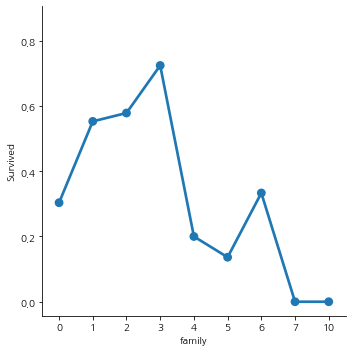

In [ ]:
# 가족인원수 별 생존율
sns.factorplot('family','Survived',data=titanic, errwidth=0)

C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


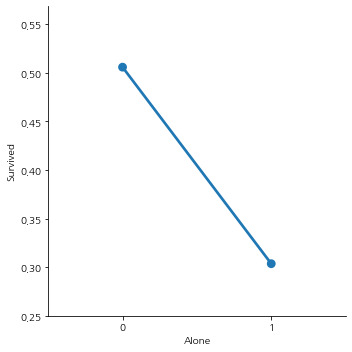

In [ ]:
# 가족이 있는 경우와 없는 경우 생존율 비교
# alone=1은 가족이 1명도 없는 경우
sns.factorplot('Alone','Survived',data=titanic, errwidth=0)

<AxesSubplot:ylabel='Frequency'>

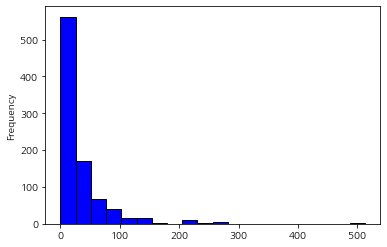

In [ ]:
# Fare를 구간으로 변경하는 파생변수 생성
titanic.Fare.plot.hist(bins=20,edgecolor='black',color='blue')

In [ ]:
print(titanic['Fare'].max())
print(titanic['Fare'].min())
print(titanic['Fare'].mean())

512.3292
0.0
32.2042079685746


In [ ]:
ranges=[0, 10, 20, 30, 40, 100, 520]
titanic['fare_bins'] = pd.cut(titanic['Fare'],ranges)

In [ ]:
titanic['fare_bins'].value_counts()

(0, 10]       321
(10, 20]      179
(20, 30]      142
(40, 100]     123
(30, 40]       58
(100, 520]     53
Name: fare_bins, dtype: int64

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group,family,Alone,fare_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2.0,1,0,"(0, 10]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3.0,1,0,"(40, 100]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2.0,0,1,"(0, 10]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3.0,1,0,"(40, 100]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3.0,0,1,"(0, 10]"


C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SIM-Koreatech\anaconda3\envs\text\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


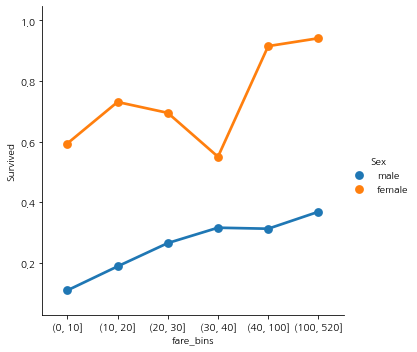

In [ ]:
sns.factorplot('fare_bins','Survived',data=titanic, hue='Sex', errwidth=0)
plt.show()

In [ ]:
# 요금 range별로 숫자로 대체
titanic.loc[titanic['Fare']<= 10,'Fare_ca']=0
titanic.loc[(titanic['Fare']> 10)&(titanic['Fare']<= 20),'Fare_ca']=1
titanic.loc[(titanic['Fare']> 20)&(titanic['Fare']<= 30),'Fare_ca']=2
titanic.loc[(titanic['Fare']> 30)&(titanic['Fare']<= 40),'Fare_ca']=3
titanic.loc[(titanic['Fare']> 40)&(titanic['Fare']<= 100),'Fare_ca']=4
titanic.loc[titanic['Fare']> 100,'Fare_ca']=5

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group,family,Alone,fare_bins,Fare_ca
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,2.0,1,0,"(0, 10]",0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,3.0,1,0,"(40, 100]",4.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,2.0,0,1,"(0, 10]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,3.0,1,0,"(40, 100]",4.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,3.0,0,1,"(0, 10]",0.0


In [ ]:
# 범주형 데이터를 범주를 숫자로 변환
titanic['Sex'].replace(['male','female'],[0,1],inplace=True)
titanic['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
titanic['Initial'].replace(['Mr','Mrs','Miss','Master'],[0,1,2,3],inplace=True)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_group,family,Alone,fare_bins,Fare_ca
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,2.0,1,0,"(0, 10]",0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,3.0,1,0,"(40, 100]",4.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,2.0,0,1,"(0, 10]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,3.0,1,0,"(40, 100]",4.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,3.0,0,1,"(0, 10]",0.0


In [ ]:
# 필요한 변수만 선택
data = titanic[['Survived', 'Pclass', 'Initial', 'Sex', 'Age_group','family','Alone', 'Fare_ca', 'Embarked']]

In [ ]:
data.head()

,Survived,Pclass,Initial,Sex,Age_group,family,Alone,Fare_ca,Embarked
0,0,3,0,0,2.0,1,0,0.0,0
1,1,1,1,1,3.0,1,0,4.0,1
2,1,3,2,1,2.0,0,1,0.0,0
3,1,1,1,1,3.0,1,0,4.0,0
4,0,3,0,0,3.0,0,1,0.0,0


<AxesSubplot:>

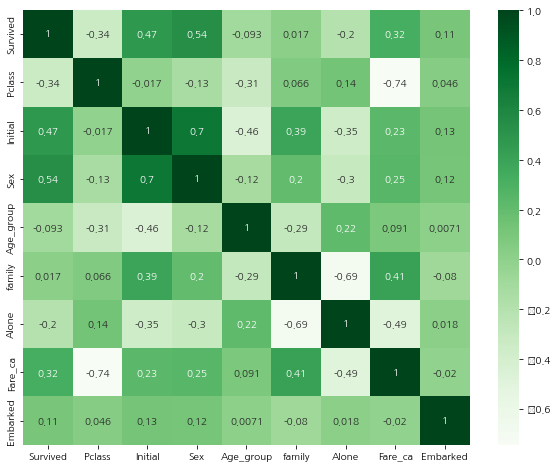

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Greens',annot=True)

### 4. 데이터 분할 및 로지스틱 회귀분석

In [ ]:
feature_columns = list(data.columns.difference(["Survived"]))
X = data[feature_columns]
y = data['Survived']

In [ ]:
X.head()

,Age_group,Alone,Embarked,Fare_ca,Initial,Pclass,Sex,family
0,2.0,0,0,0.0,0,3,0,1
1,3.0,0,1,4.0,1,1,1,1
2,2.0,1,0,0.0,2,3,1,0
3,3.0,0,0,4.0,1,1,1,1
4,3.0,1,0,0.0,0,3,0,0


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
# 데이터 분할
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(623, 8) (268, 8) (623,) (268,)


#### 1) 사이킷런 패키지 이용

In [ ]:
# 모델 적합
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [ ]:
pred = model.predict(test_x)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [ ]:
# 정확도 계산
accuracy_score(pred, test_y)*100

83.95522388059702

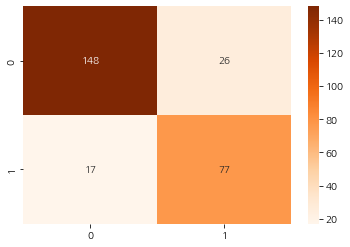

In [ ]:
# confusion matrix 그리기
sns.heatmap(confusion_matrix(pred,test_y), cmap = 'Oranges', annot = True, fmt = '2.0f')
plt.show()

#### 2) sm 패키지 이용

In [ ]:
data_processed = sm.add_constant(data, has_constant='add')
data_processed

,const,Survived,Pclass,Initial,Sex,Age_group,family,Alone,Fare_ca,Embarked
0,1.0,0,3,0,0,2.0,1,0,0.0,0
1,1.0,1,1,1,1,3.0,1,0,4.0,1
2,1.0,1,3,2,1,2.0,0,1,0.0,0
3,1.0,1,1,1,1,3.0,1,0,4.0,0
4,1.0,0,3,0,0,3.0,0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...
886,1.0,0,2,0,0,2.0,0,1,1.0,0
887,1.0,1,1,2,1,1.0,0,1,2.0,0
888,1.0,0,3,2,1,2.0,3,0,2.0,0
889,1.0,1,1,0,0,2.0,0,1,2.0,1


In [ ]:
feature_columns = list(data_processed.columns.difference(["Survived"]))
X1 = data_processed[feature_columns]
y1 = data_processed['Survived']

In [ ]:
# 데이터 분할
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, y1, stratify=y1,train_size=0.7,test_size=0.3,random_state=42)
print(train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape)

(623, 9) (268, 9) (623,) (268,)


In [ ]:
train_x1.head()

,Age_group,Alone,Embarked,Fare_ca,Initial,Pclass,Sex,const,family
748,1.0,0,0,4.0,0,1,0,1.0,1
45,3.0,1,0,0.0,0,3,0,1.0,0
28,2.0,1,2,0.0,2,3,1,1.0,0
633,3.0,1,0,0.0,0,1,0,1.0,0
403,2.0,0,0,1.0,0,3,0,1.0,1


In [ ]:
# 모델 적합
model1 = sm.Logit(train_y1, train_x1)
results = model1.fit()

Optimization terminated successfully.
         Current function value: 0.426180
         Iterations 6


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            8
Date:                Wed, 10 May 2023   Pseudo R-squ.:                  0.3599
Time:                        23:38:04   Log-Likelihood:                -265.51
converged:                       True   LL-Null:                       -414.80
Covariance Type:            nonrobust   LLR p-value:                 8.251e-60
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age_group     -0.2160      0.109     -1.973      0.048      -0.431      -0.001
Alone         -0.6035      0.348     -1.732      0.083      -1.286       0.079
Embarked       0.2025      0.177      1.143      0.253      -0.145       0.550
Fare_ca        0.0929      0.136      0.685      0.493      -0.173       0.359
Initial        0.6674      0.187      3.560      0.000       0.300       1.035
Pclass        -0.9533      0.242     -3.936      0.000      -1.428      -0.479
Sex            1.9036      0.309      6.160      0.000       1.298       2.509
const          1.5193      0.850      1.787      0.074      -0.147       3.185
family        -0.4469      0.134     -3.346      0.001      -0.709      -0.185
==============================================================================
"""

In [ ]:
# 로지스틱 회귀 계수의 경우 log형태가 취해진 결과이므로 exp 변환을 적용해야 함
# 회귀계수 (해석을 위하여 exp를 적용함)
np.exp(results.params)

Age_group    0.805714
Alone        0.546920
Embarked     1.224472
Fare_ca      1.097384
Initial      1.949230
Pclass       0.385464
Sex          6.709952
const        4.569139
family       0.639625
dtype: float64

In [ ]:
pred_sm = results.predict(test_x1)

In [ ]:
pred_sm

625    0.301792
566    0.103393
459    0.100914
804    0.085013
338    0.056885
         ...   
184    0.766736
607    0.452469
624    0.092526
103    0.069647
387    0.844561
Length: 268, dtype: float64

In [ ]:
# threshold에 따라서 0과 1을 결정하는 cut off 함수 만들기
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

In [ ]:
# cut off를 적용한 Y 예측치

pred_y1 = cut_off(pred_sm,0.5)
pred_y1

625    0
566    0
459    0
804    0
338    0
      ..
184    1
607    0
624    0
103    0
387    1
Length: 268, dtype: int32

In [ ]:
cm=confusion_matrix(test_y1, pred_y1)

In [ ]:
## confusion matrix accuracy계산하기
(cm[0,0] + cm[1,1])/len(pred_y1)

0.835820895522388

AUC: 0.8789349808767285


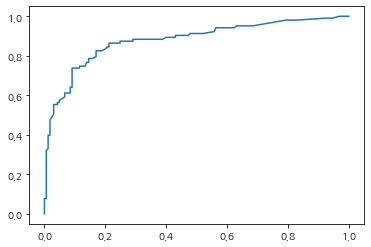

In [ ]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y1, pred_sm, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


#### 4) Fare_ca를 제외하고 다시 분석

In [ ]:
# 사이킷런 패키지 이용
feature_columns1 = list(data.columns.difference(["Survived", "Fare_ca"]))
X2 = data[feature_columns1]
y2 = data['Survived']

In [ ]:
X2.head()

,Age_group,Alone,Embarked,Initial,Pclass,Sex,family
0,2.0,0,0,0,3,0,1
1,3.0,0,1,1,1,1,1
2,2.0,1,0,2,3,1,0
3,3.0,0,0,1,1,1,1
4,3.0,1,0,0,3,0,0


In [ ]:
# 데이터 분할
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, y2, stratify=y2,train_size=0.7,test_size=0.3,random_state=42)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(623, 7) (268, 7) (623,) (268,)


In [ ]:
# 모델 적합
model2 = LogisticRegression()
model2.fit(train_x2, train_y2)

LogisticRegression()

In [ ]:
pred2 = model2.predict(test_x2)

In [ ]:
# 정확도 계산
accuracy_score(pred2, test_y2)*100

83.5820895522388

In [ ]:
# 오히려 정확도 감소하여 삭제할 이유 없음